In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv(r"synthetic_battery_data.csv")

# EDA
print(data.info())
print(data.describe())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Fixed Battery Voltage          1000 non-null   float64
 1   Portable Battery Voltage       1000 non-null   float64
 2   Portable Battery Current       1000 non-null   float64
 3   Fixed Battery Current          1000 non-null   float64
 4   Motor Status                   1000 non-null   object 
 5   BCM Battery Selected           1000 non-null   object 
 6   Portable Battery Temperatures  1000 non-null   float64
 7   Fixed Battery Temperatures     1000 non-null   float64
 8   Effective SOC                  1000 non-null   float64
dtypes: float64(7), object(2)
memory usage: 70.4+ KB
None
       Fixed Battery Voltage  Portable Battery Voltage  \
count            1000.000000               1000.000000   
mean               12.470770                 12.521052   
std

In [27]:
data1=data.drop(['Motor Status','BCM Battery Selected'],axis=1)

In [39]:
print(data1.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Fixed Battery Voltage          1000 non-null   float64
 1   Portable Battery Voltage       1000 non-null   float64
 2   Portable Battery Current       1000 non-null   float64
 3   Fixed Battery Current          1000 non-null   float64
 4   Portable Battery Temperatures  1000 non-null   float64
 5   Fixed Battery Temperatures     1000 non-null   float64
 6   Effective SOC                  1000 non-null   float64
dtypes: float64(7)
memory usage: 54.8 KB
None


In [41]:
print(data1.describe())

       Fixed Battery Voltage  Portable Battery Voltage  \
count            1000.000000               1000.000000   
mean               12.470770                 12.521052   
std                 0.876412                  0.876570   
min                11.013896                 11.009655   
25%                11.707920                 11.723223   
50%                12.490422                 12.556202   
75%                13.232959                 13.281395   
max                13.999153                 13.998241   

       Portable Battery Current  Fixed Battery Current  \
count               1000.000000            1000.000000   
mean                   2.512029               2.451875   
std                    1.453371               1.432447   
min                    0.000058               0.003267   
25%                    1.306755               1.209504   
50%                    2.503070               2.421396   
75%                    3.795518               3.687704   
max          

In [43]:
# Data Preparation
X = data1.drop('Effective SOC', axis=1)
y = data1['Effective SOC']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [45]:
# Model Development
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')



Mean Absolute Error (MAE): 2.40322494137956
Mean Squared Error (MSE): 7.268546680882813
Root Mean Squared Error (RMSE): 2.696024235959835
R-squared (R²): -0.020369035265933588


In [47]:
# Feature Importance
feature_importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)



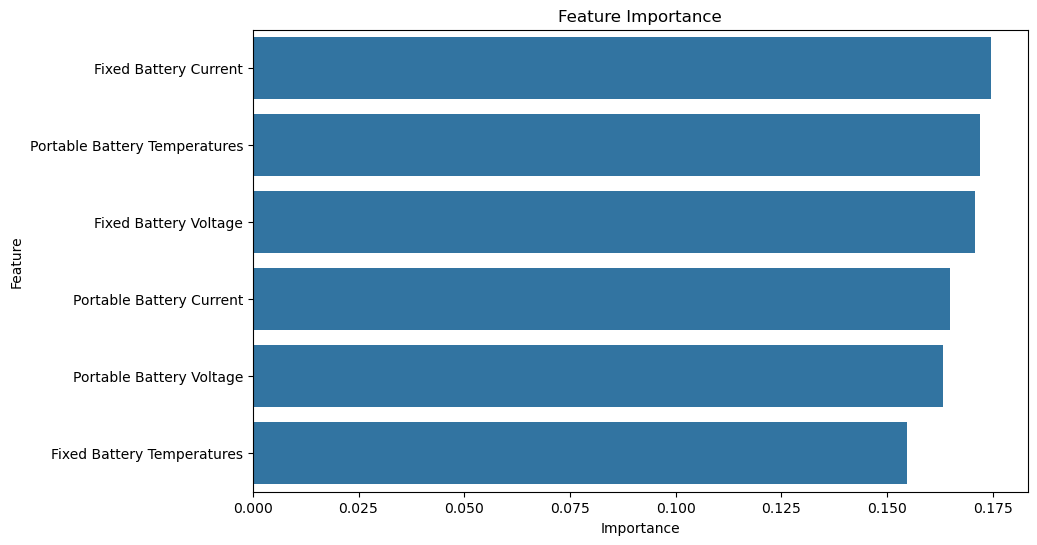

In [51]:
# Visualize Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title('Feature Importance')
plt.show()


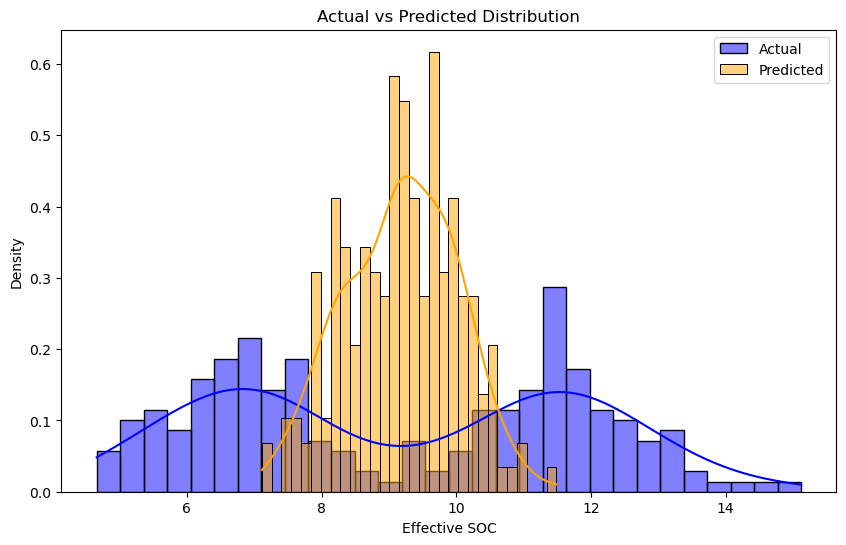

In [53]:
# Prediction Distribution
plt.figure(figsize=(10, 6))
sns.histplot(y_test, color='blue', label='Actual', kde=True, stat='density', bins=30)
sns.histplot(y_pred, color='orange', label='Predicted', kde=True, stat='density', bins=30)
plt.title('Actual vs Predicted Distribution')
plt.legend()
plt.show()